# Exploratory Data Analysis (EDA)

## Import Python Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
# from ydata_profiling import ProfileReport
import gradio as gr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

## Phase 2: Analyzing Data

In this phase, we will examine the structure of our dataset to understand its contents and detect potential issues, such as missing values, duplicates, and data inconsistencies. We will also perform some initial data preprocessing steps. The tasks we will focus on include:

- **Shape** of the dataset
- **Dataset Info** (column names, data types)
- **Missing Values** (checking and handling missing data)
- **Duplicated Data** (identifying and removing duplicates)
- **Data Type Corrections** (correcting inconsistent data values, e.g., replacing 101 with 100 for `Exam_Score`)
- **Categorical and Numerical Variables** (separating the variables into categories)
- **Descriptive Statistics** (providing summary statistics for numerical columns)


In [99]:
data=pd.read_csv("StudentPerformanceFactors.csv")
data.shape

(6607, 20)

In [100]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [101]:
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [103]:
duplicates = data.duplicated().sum()

In [104]:
data.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [105]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [106]:
(data.isnull().sum()/(len(data)))*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

<Axes: >

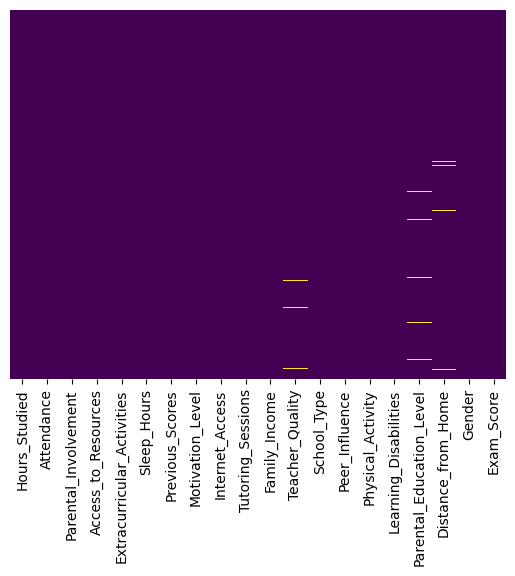

In [107]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [108]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [109]:
# Exploring unique values and value counts
categorical_columns = data.select_dtypes(include=['object','int64']).columns
for column in categorical_columns:
    unique_values=data[column].unique()
    counts=data[column].value_counts()
    print(f"\nUnique values in {column} : ")
    print(unique_values)
    print(f"\nCounts of each value in {column} : ")
    print(counts.to_string())




Unique values in Hours_Studied : 
[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]

Counts of each value in Hours_Studied : 
Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1

Unique values in Attendance : 
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]

Counts of each value in Attendance : 
Attendance
67     190
98     187
76     185
77     184
64     182
94     180
84     175
79     175
91     175
82     173
68     170
69

In [110]:
# Correct type score max is 101 when it should be 100
data["Exam_Score"]=data["Exam_Score"].replace(101,100)

In [111]:
# Seperate categorical and Numerical variables
cat_cols=data.select_dtypes(include=['object']).columns
num_cols=data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables : ")
print(cat_cols)
print("Numerical Variables : ")
print(num_cols)

Categorical Variables : 
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')
Numerical Variables : 
['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


## Phase 2 : Visualizing Data Distribution

To understand the distribution and potential skewness of numerical features, we visualize each column using histograms and boxplots.

### EDA Univariate Analysis


- **Histogram**: Helps visualize the shape of the data and identify patterns like skewness or bimodal distributions.
- **Boxplot**: Summarizes the central tendency, spread, and highlights potential outliers in the data.

Hours_Studied
skew :  0.01


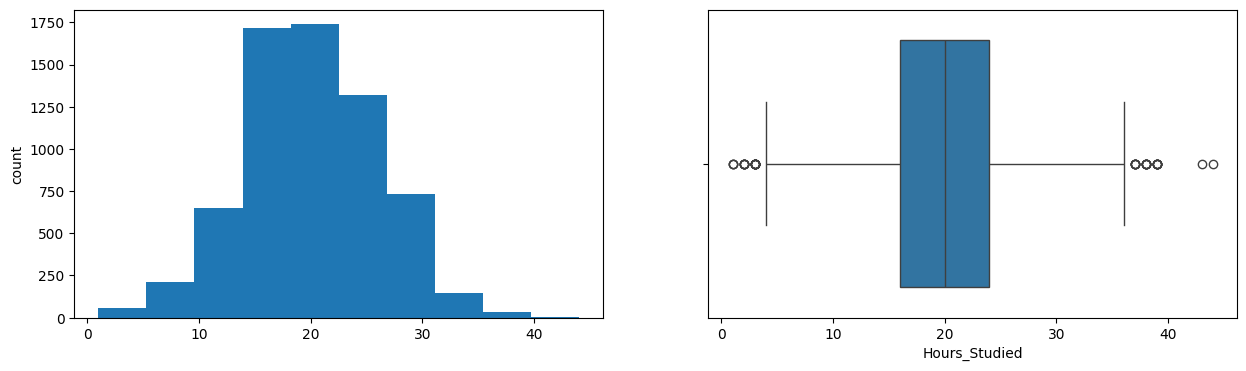

Attendance
skew :  0.01


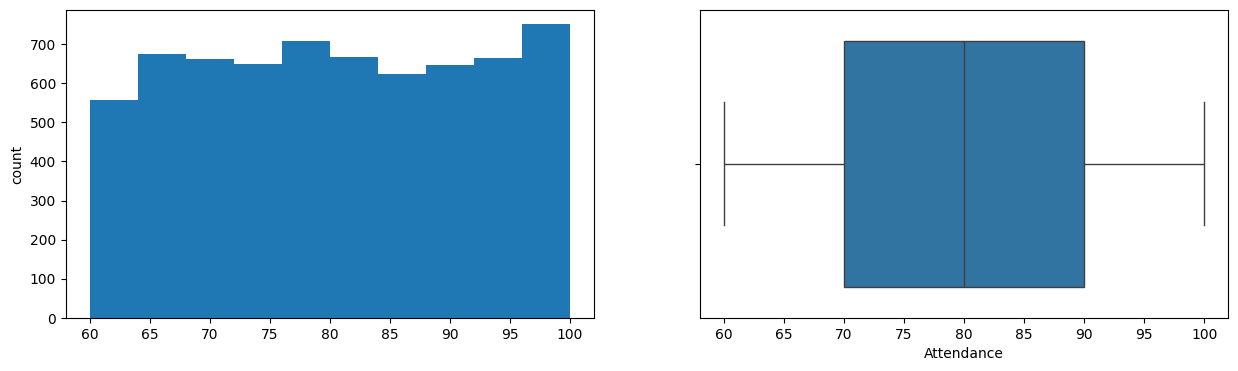

Sleep_Hours
skew :  -0.02


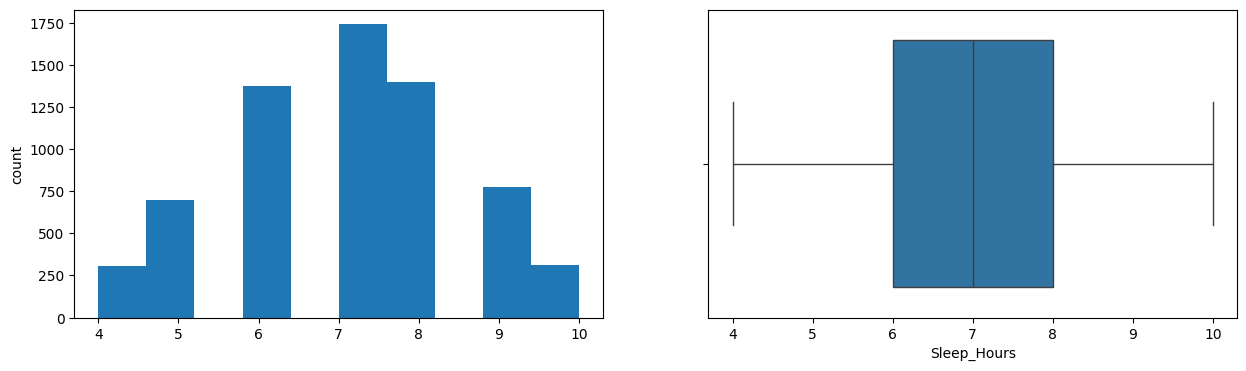

Previous_Scores
skew :  -0.0


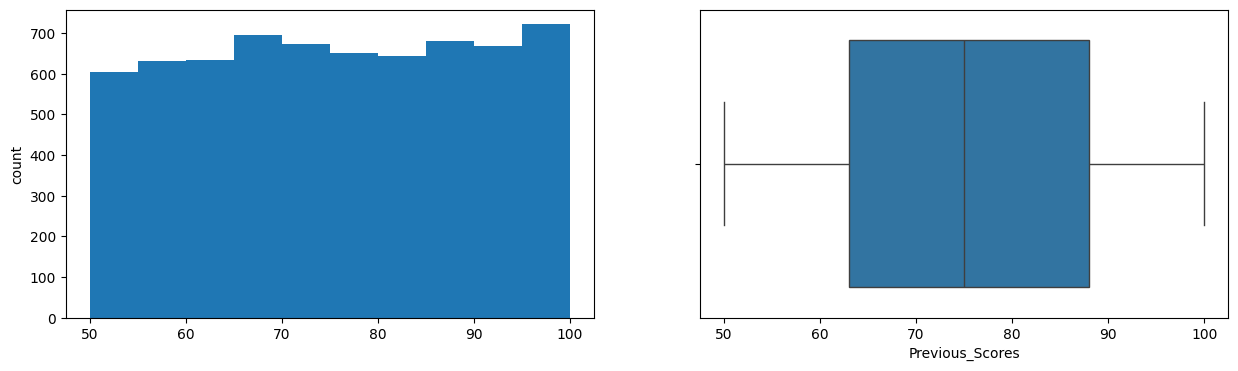

Tutoring_Sessions
skew :  0.82


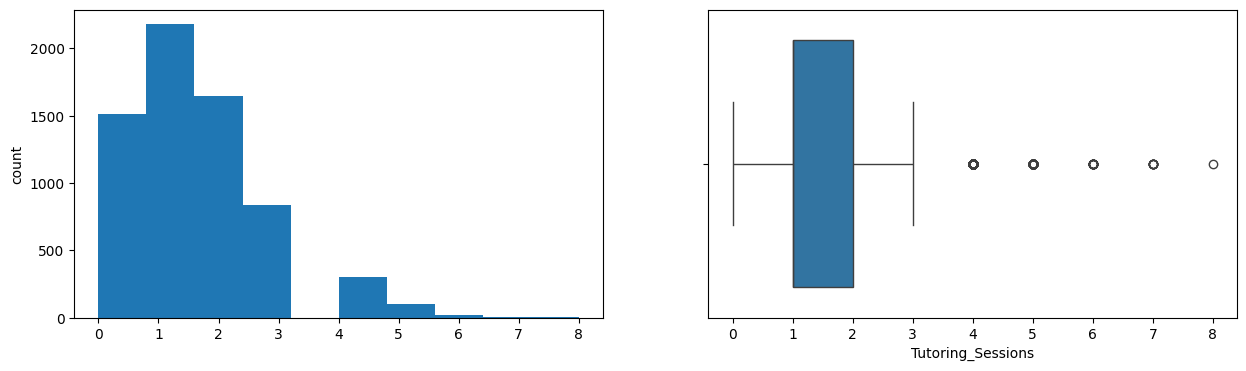

Physical_Activity
skew :  -0.03


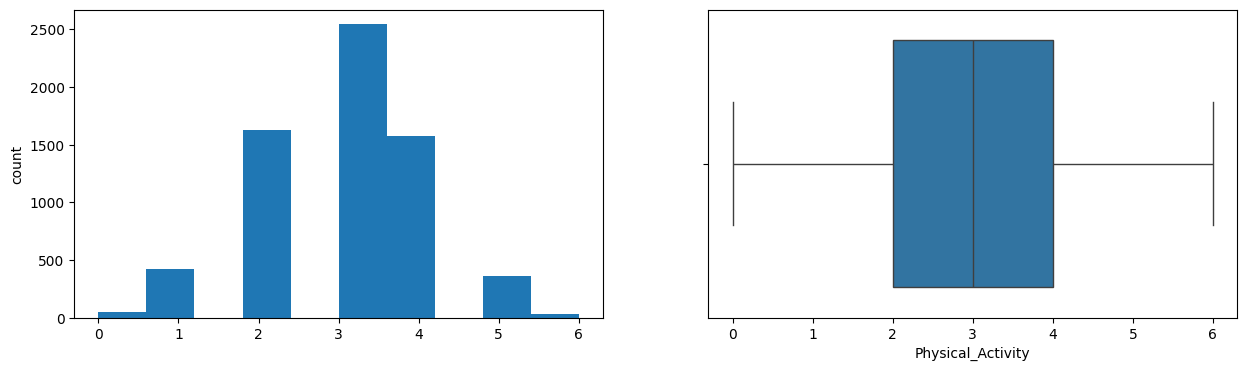

Exam_Score
skew :  1.64


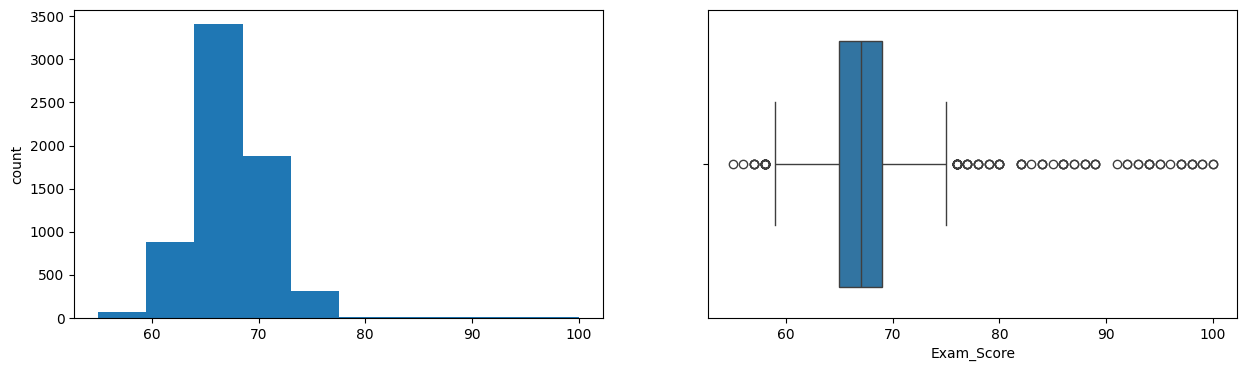

In [112]:
for col in num_cols:
    print(col)
    print("skew : ",round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

Unique values in Parental_Involvement: ['Low' 'Medium' 'High']


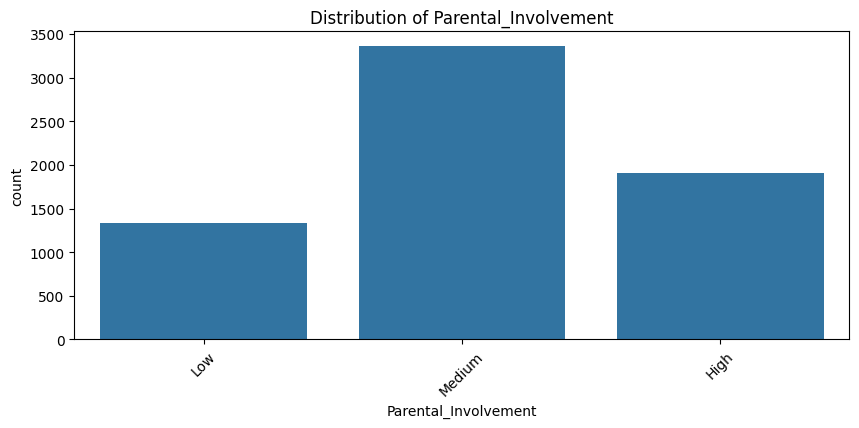

Unique values in Access_to_Resources: ['High' 'Medium' 'Low']


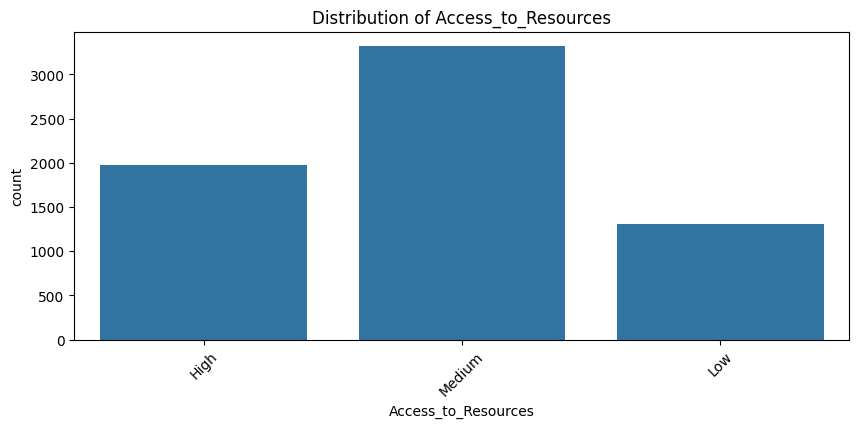

Unique values in Extracurricular_Activities: ['No' 'Yes']


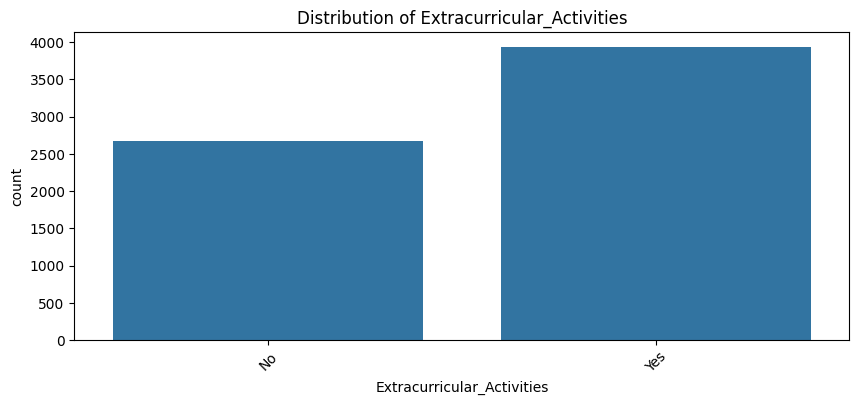

Unique values in Motivation_Level: ['Low' 'Medium' 'High']


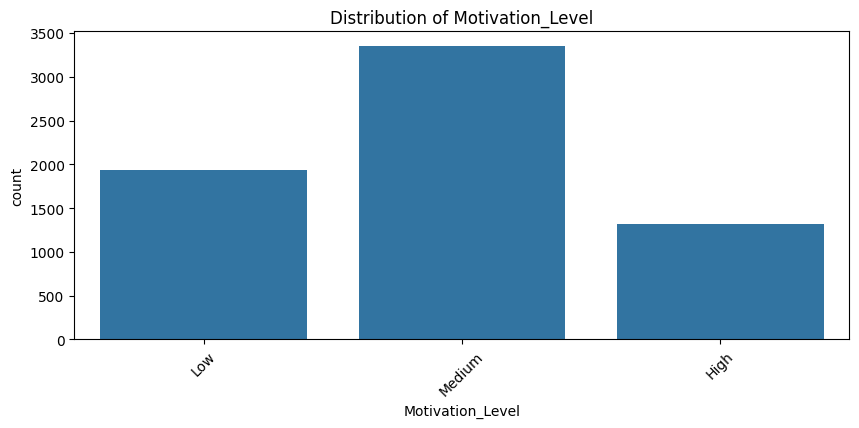

Unique values in Internet_Access: ['Yes' 'No']


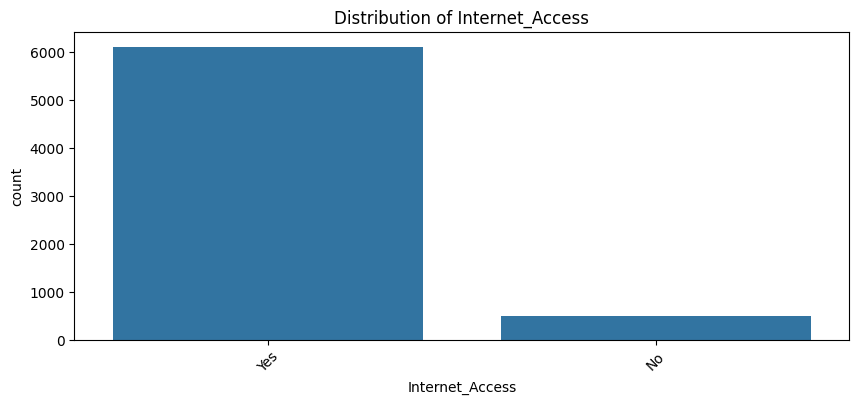

Unique values in Family_Income: ['Low' 'Medium' 'High']


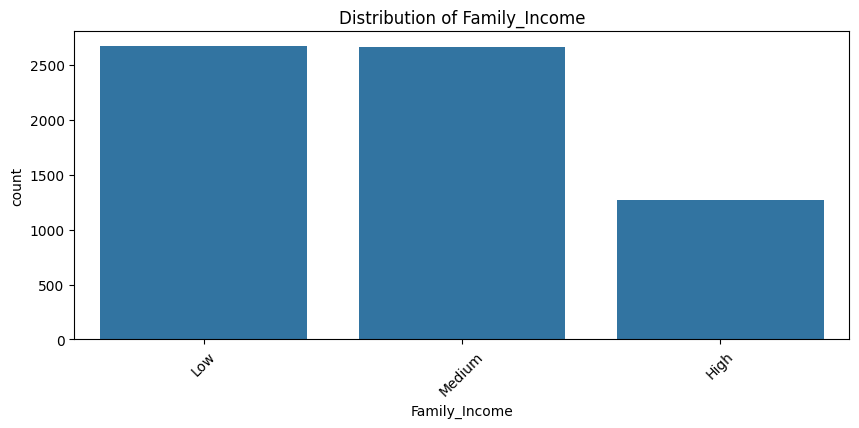

Unique values in Teacher_Quality: ['Medium' 'High' 'Low' nan]


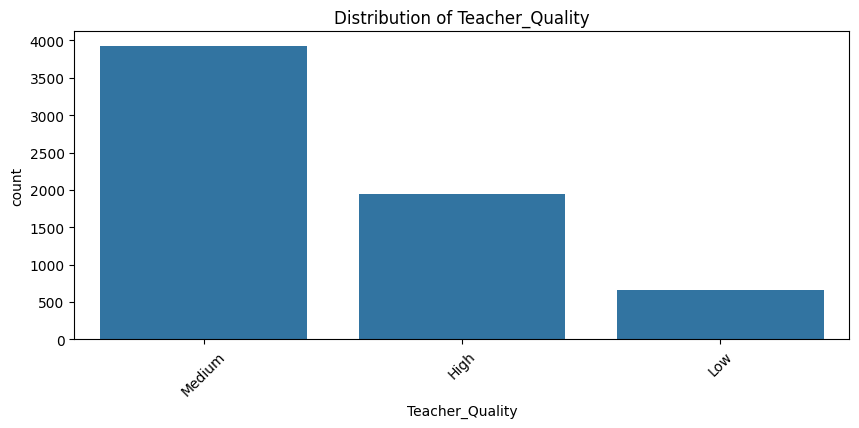

Unique values in School_Type: ['Public' 'Private']


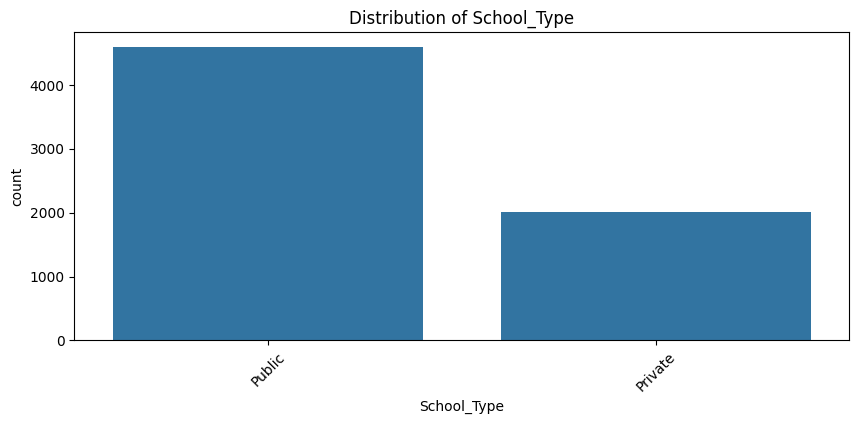

Unique values in Peer_Influence: ['Positive' 'Negative' 'Neutral']


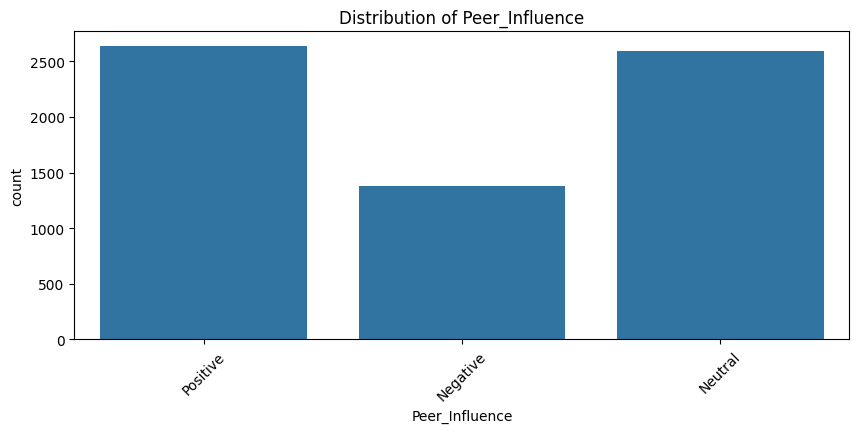

Unique values in Learning_Disabilities: ['No' 'Yes']


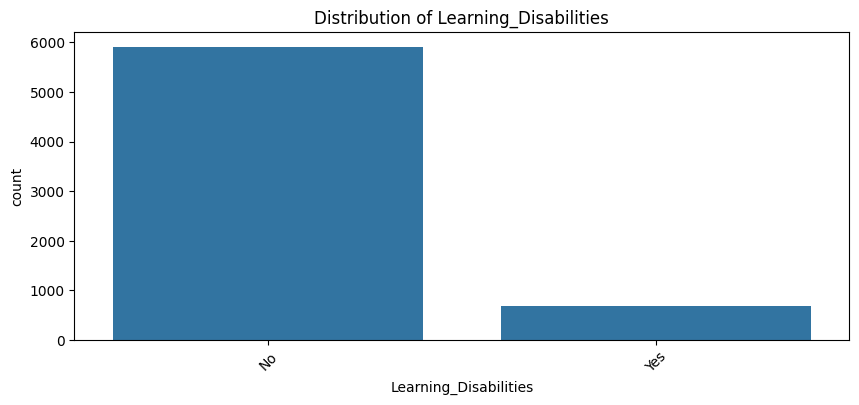

Unique values in Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]


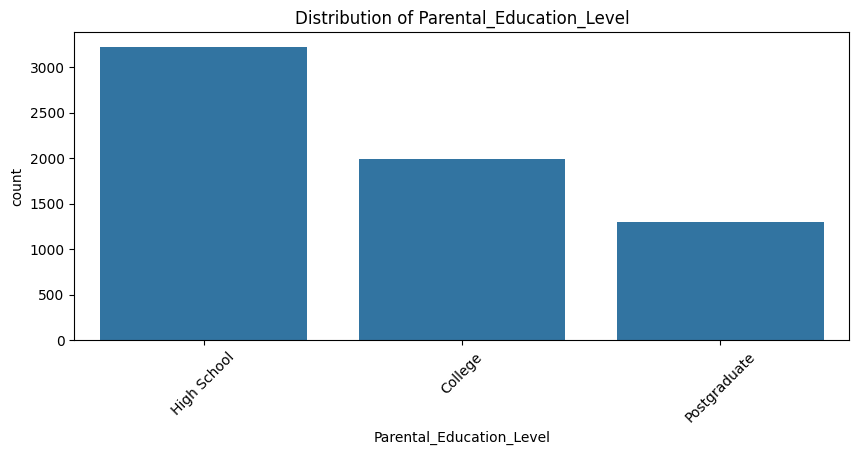

Unique values in Distance_from_Home: ['Near' 'Moderate' 'Far' nan]


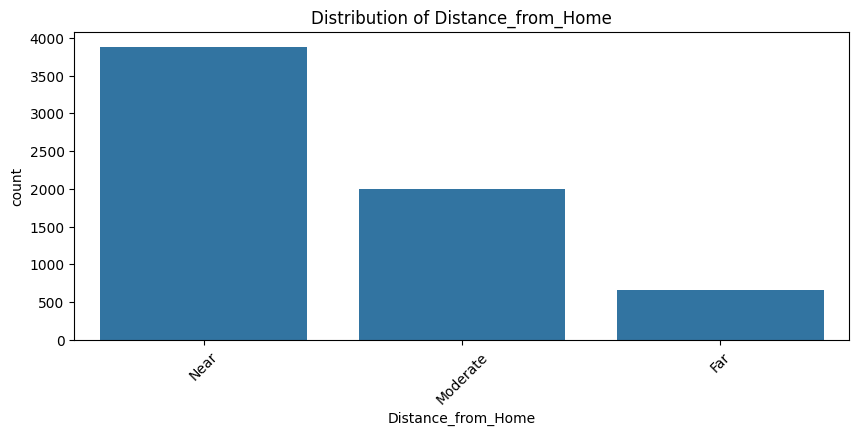

Unique values in Gender: ['Male' 'Female']


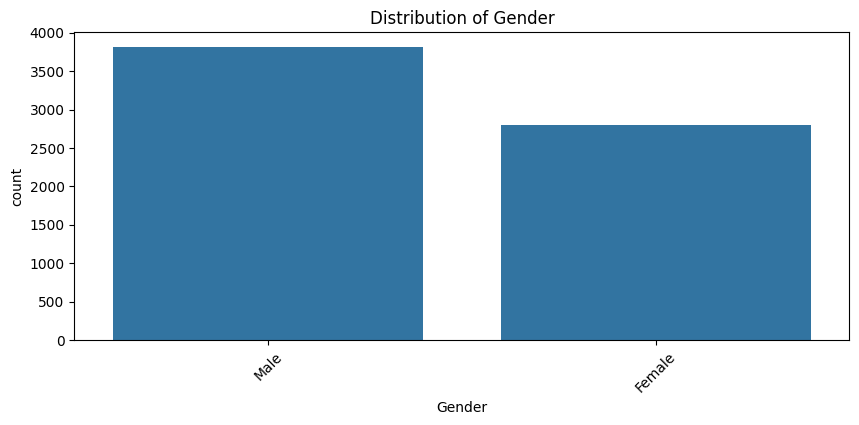

In [113]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[col])
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title(f"Distribution of {col}")
    plt.show()

### EDA Bivariate Analysis 

**Scatter Plot**
A **scatter plot** is used to display the relationship between two numerical variables. In this case, we visualize the relationship between each feature in the dataset and the **Exam_Score**. Each point on the scatter plot represents an observation in the dataset, with its **x**-coordinate corresponding to the feature value and its **y**-coordinate corresponding to the **Exam_Score**.

Hours_Studied


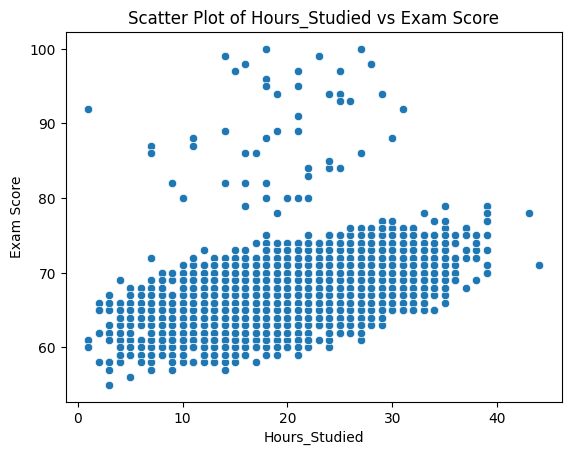

Attendance


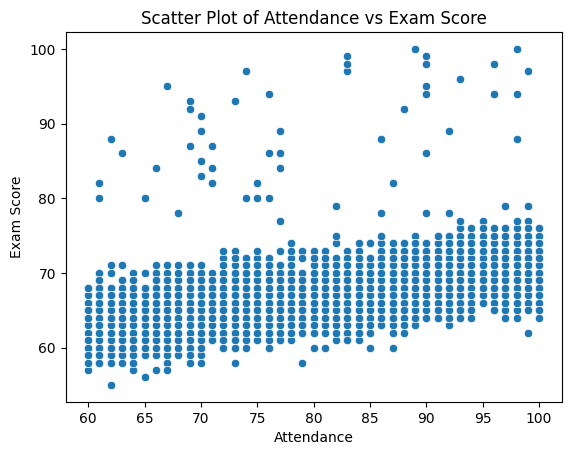

Parental_Involvement


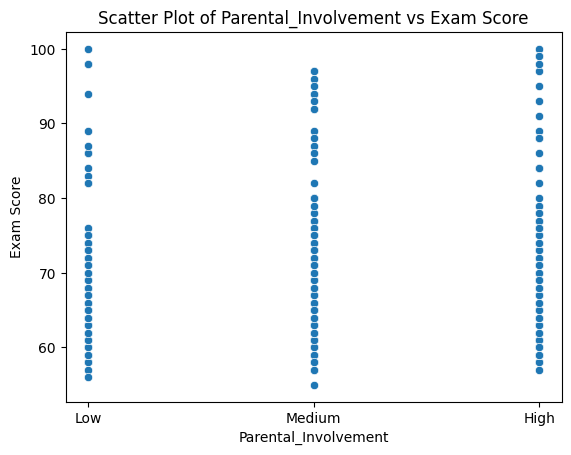

Access_to_Resources


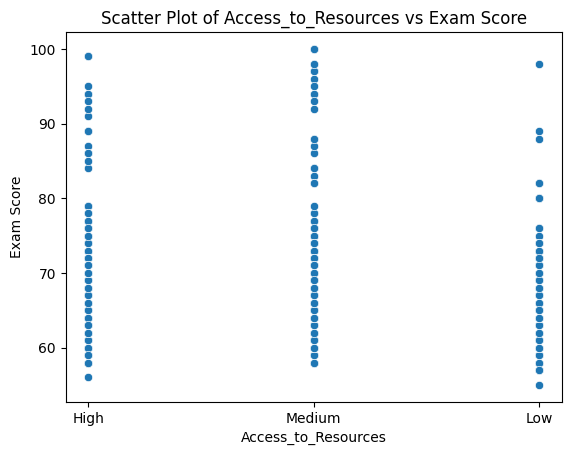

Extracurricular_Activities


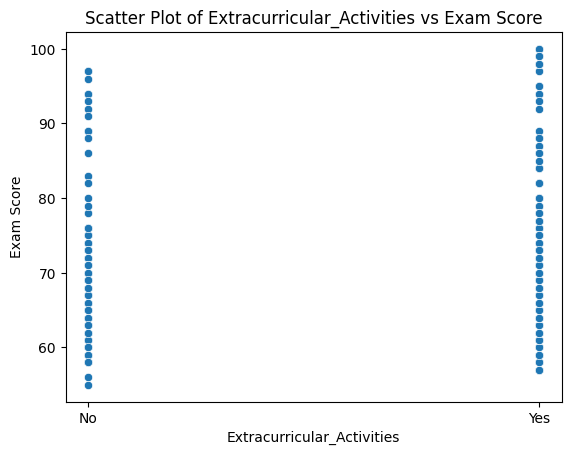

Sleep_Hours


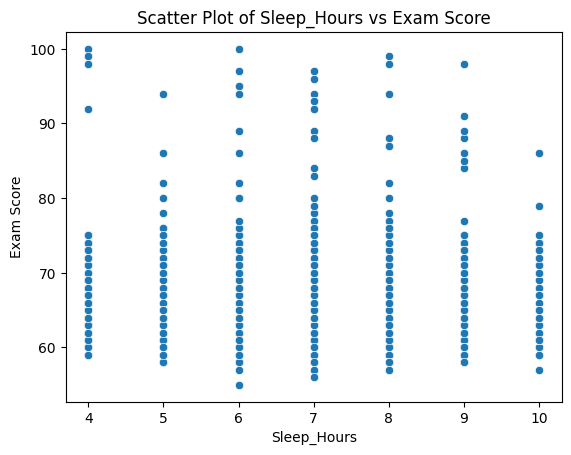

Previous_Scores


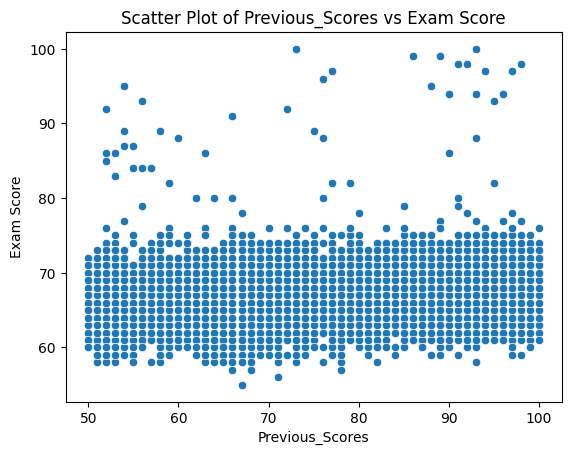

Motivation_Level


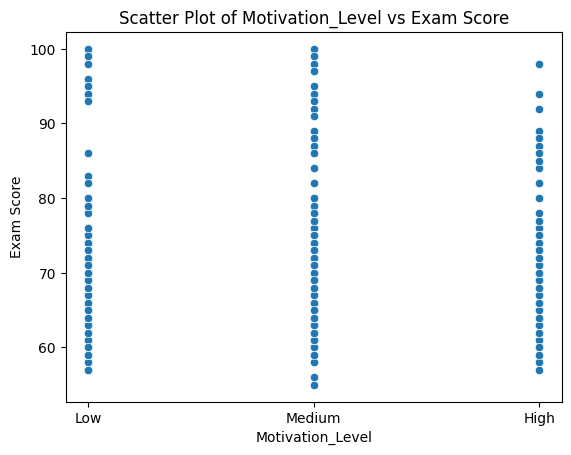

Internet_Access


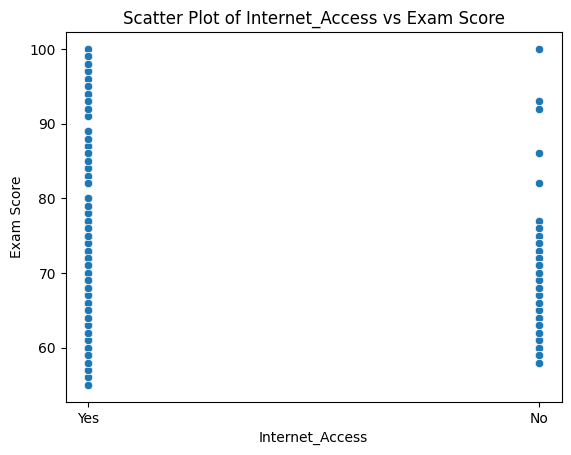

Tutoring_Sessions


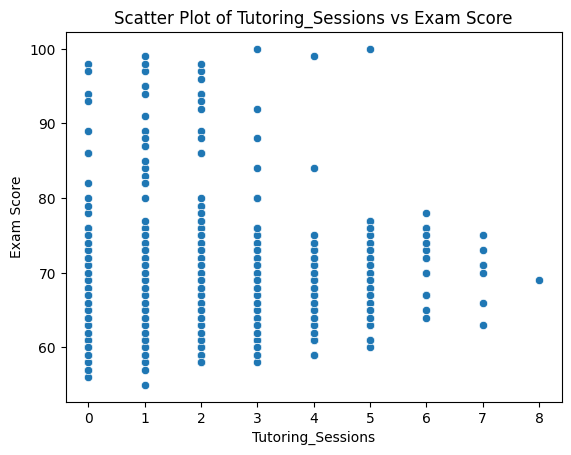

Family_Income


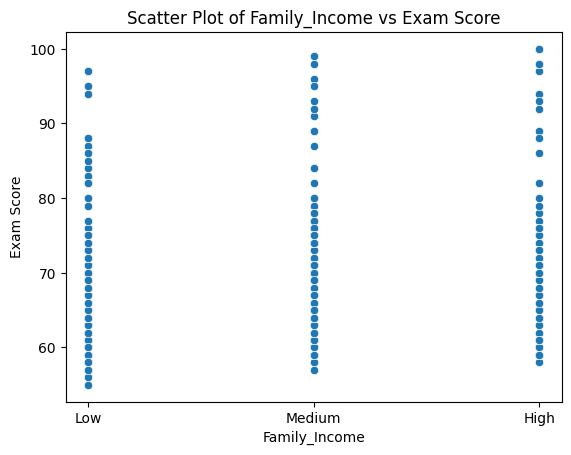

Teacher_Quality


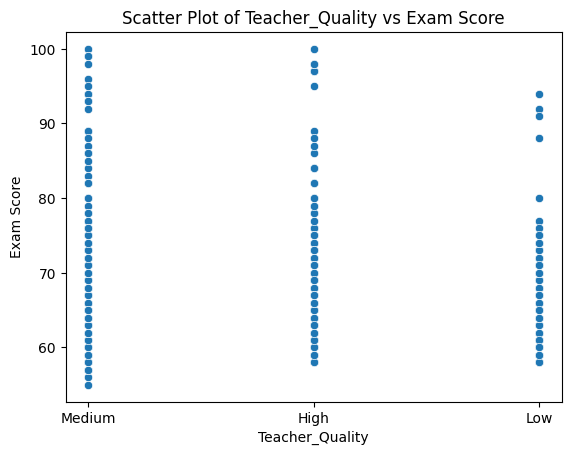

School_Type


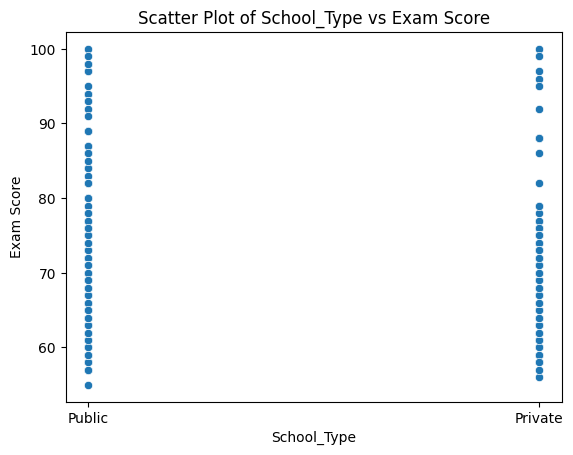

Peer_Influence


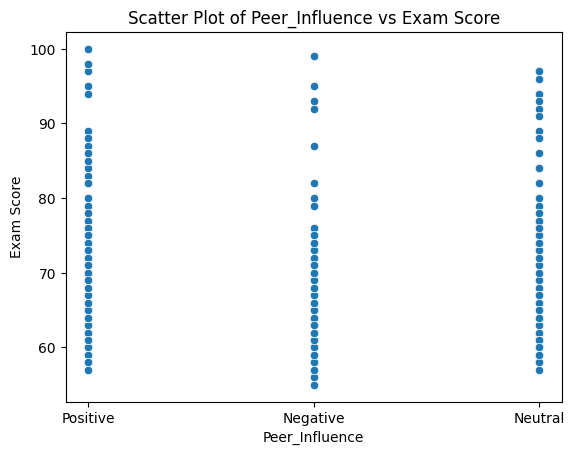

Physical_Activity


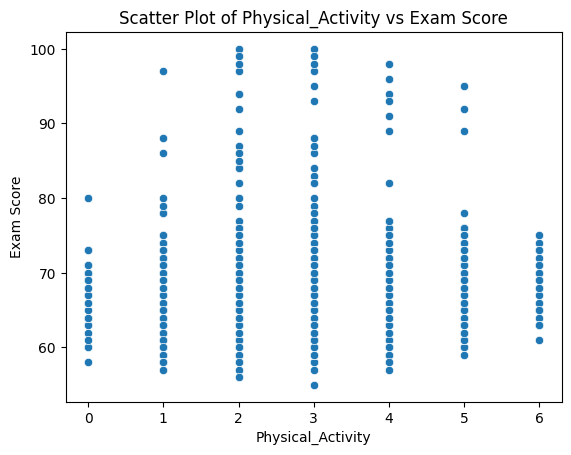

Learning_Disabilities


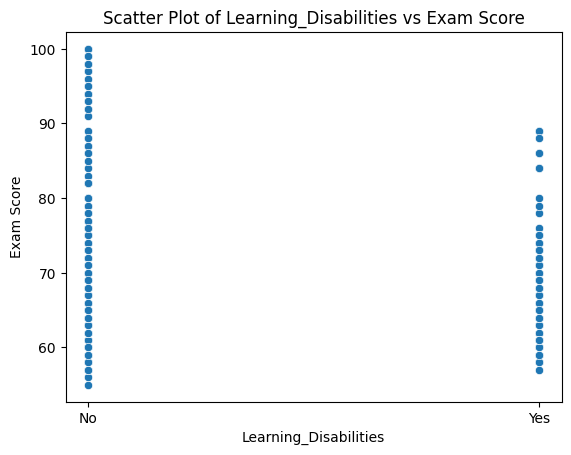

Parental_Education_Level


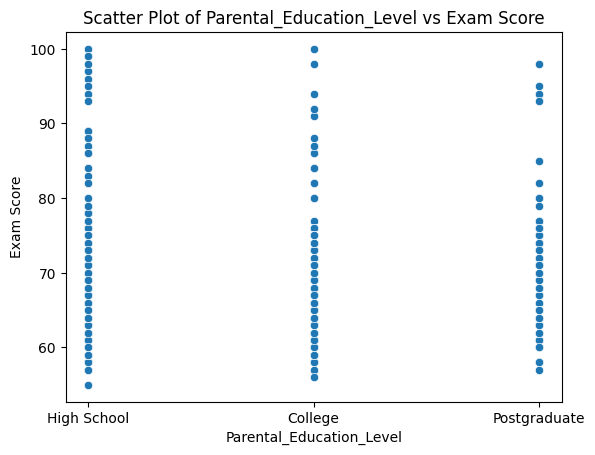

Distance_from_Home


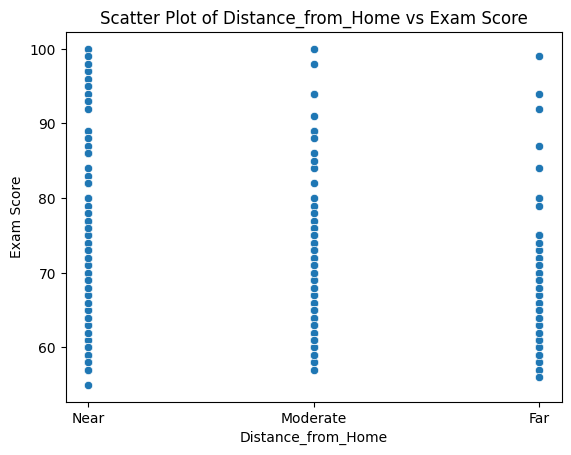

Gender


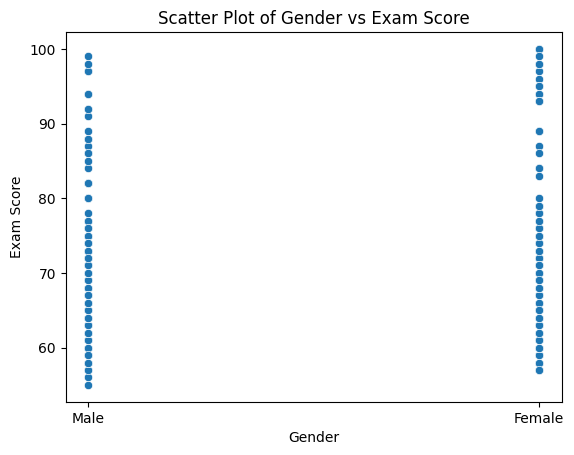

In [114]:
#How variable related to the exam score (dependent andindependent)
for col in data.columns:
    if col != 'Exam_Score':
       print(col)
       sns.scatterplot(x=data[col], y=data['Exam_Score'])
       plt.title(f'Scatter Plot of {col} vs Exam Score')
       plt.xlabel(col)
       plt.ylabel('Exam Score')
       plt.show()

## Phase 3 : Data Preparation
 The first step in preprocessing is splitting the dataset into **training**, **validation**, and **test** sets. This helps us to train the model on one portion of the data and evaluate it on unseen data (validation and test sets) to check the model’s performance.


### Data Splitting
We split the data into three sets: train, validation, and test. We use the first to train our model, the validation set to choose the best model, and the test set for the final evaluation.


In [115]:
x=data.drop(columns=["Exam_Score"])
y=data['Exam_Score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
train_data=pd.concat([x_train,y_train],axis=1)
valid_data=pd.concat([x_valid,y_valid],axis=1)
test_data=pd.concat([x_test,y_test],axis=1)


### Handling Missing Values in Train Data
- Missing values in the training dataset were identified.
- A strategy (e.g., mean/median imputation, or removal) was applied to handle the missing values in the training data to prepare it for modeling.

In [116]:
train_data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000
mean,19.979659,79.965705,7.024361,75.035241,1.487465,2.961447,67.225875
std,6.041929,11.547272,1.457098,14.429271,1.237221,1.030033,3.950345
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,57.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,87.000000,2.000000,4.000000,69.000000
max,43.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [117]:
train_data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               48
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      53
Distance_from_Home            41
Gender                         0
Exam_Score                     0
dtype: int64

<Axes: >

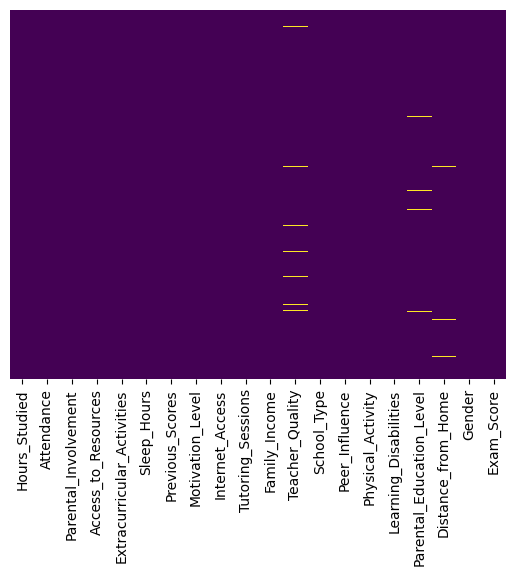

In [118]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- Missing values in the training dataset were identified.
- A strategy Mode was applied to handle the missing values in the training data to prepare it for modeling.

In [119]:
teacher_quality_mode=train_data['Teacher_Quality'].mode()[0]
train_data['Teacher_Quality'].fillna(teacher_quality_mode,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_17276\317492837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Teacher_Quality'].fillna(teacher_quality_mode,inplace=True)


In [120]:
Parental_Education_Level_mode=train_data['Parental_Education_Level'].mode()[0]
train_data['Parental_Education_Level'].fillna(Parental_Education_Level_mode,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_17276\1996478267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Parental_Education_Level'].fillna(Parental_Education_Level_mode,inplace=True)


In [121]:
Distance_from_Home_mode=train_data['Distance_from_Home'].mode()[0]
train_data['Distance_from_Home'].fillna(Distance_from_Home_mode,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_17276\13205546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Distance_from_Home'].fillna(Distance_from_Home_mode,inplace=True)


In [122]:
train_data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### Encoding Categorical Variables in Train Data

- This step converts non-numeric values into a format suitable for machine learning algorithms.

- Nominal variables in the training set were encoded using one-hot encoding 

In [123]:
#Encoding Nominal feature 
# Gender
train_data['Gender'] = pd.get_dummies(train_data['Gender'], drop_first=True, dtype=int)

# Learning Disabilities
train_data['Learning_Disabilities'] = pd.get_dummies(train_data['Learning_Disabilities'], drop_first=True, dtype=int)

# School Type
train_data['School_Type'] = pd.get_dummies(train_data['School_Type'], drop_first=True, dtype=int)

# Internet Access
train_data['Internet_Access'] = pd.get_dummies(train_data['Internet_Access'], drop_first=True, dtype=int)

# Extracurricular_Activities
train_data['Extracurricular_Activities'] = pd.get_dummies(train_data['Extracurricular_Activities'], drop_first=True, dtype=int)

- Ordinal variables in the training set were encoded using label encoding

In [124]:
# Encoding Ordinal Feature 
# ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]
    
mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

for feature in ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]:
    train_data[feature] = train_data[feature].map(mapping).astype(int)

    # Parental Education 
education_mapping = {
    "High School": 0,
    "College": 1,
    "Postgraduate": 2
}

train_data['Parental_Education_Level'] = train_data['Parental_Education_Level'].map(education_mapping).astype(int)

# Peer Influence
influence_mapping = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

train_data["Peer_Influence"] = train_data["Peer_Influence"].map(influence_mapping).astype(int)

# Distance from home
distance_mapping = {
    "Near": 0,
    "Moderate": 1,
    "Far": 2
}
train_data["Distance_from_Home"] = train_data["Distance_from_Home"].map(distance_mapping).astype(int)

In [125]:
train_data.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000,4228.000000
mean,19.979659,79.965705,1.089167,1.093898,0.597919,7.024361,75.035241,0.901845,0.920766,1.487465,0.780747,1.205771,0.695837,1.190634,2.961447,0.108089,0.689688,0.500000,0.575449,67.225875
std,6.041929,11.547272,0.697995,0.700421,0.490376,1.457098,14.429271,0.698822,0.270135,1.237221,0.743357,0.598670,0.460106,0.761374,1.030033,0.310529,0.779873,0.672027,0.494333,3.950345
min,1.000000,60.000000,0.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
25%,16.000000,70.000000,1.000000,1.000000,0.000000,6.000000,63.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,65.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,7.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,8.000000,87.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,4.000000,0.000000,1.000000,1.000000,1.000000,69.000000
max,43.000000,100.000000,2.000000,2.000000,1.000000,10.000000,100.000000,2.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,6.000000,1.000000,2.000000,2.000000,1.000000,100.000000


### Visualizing Correlation in Train Data

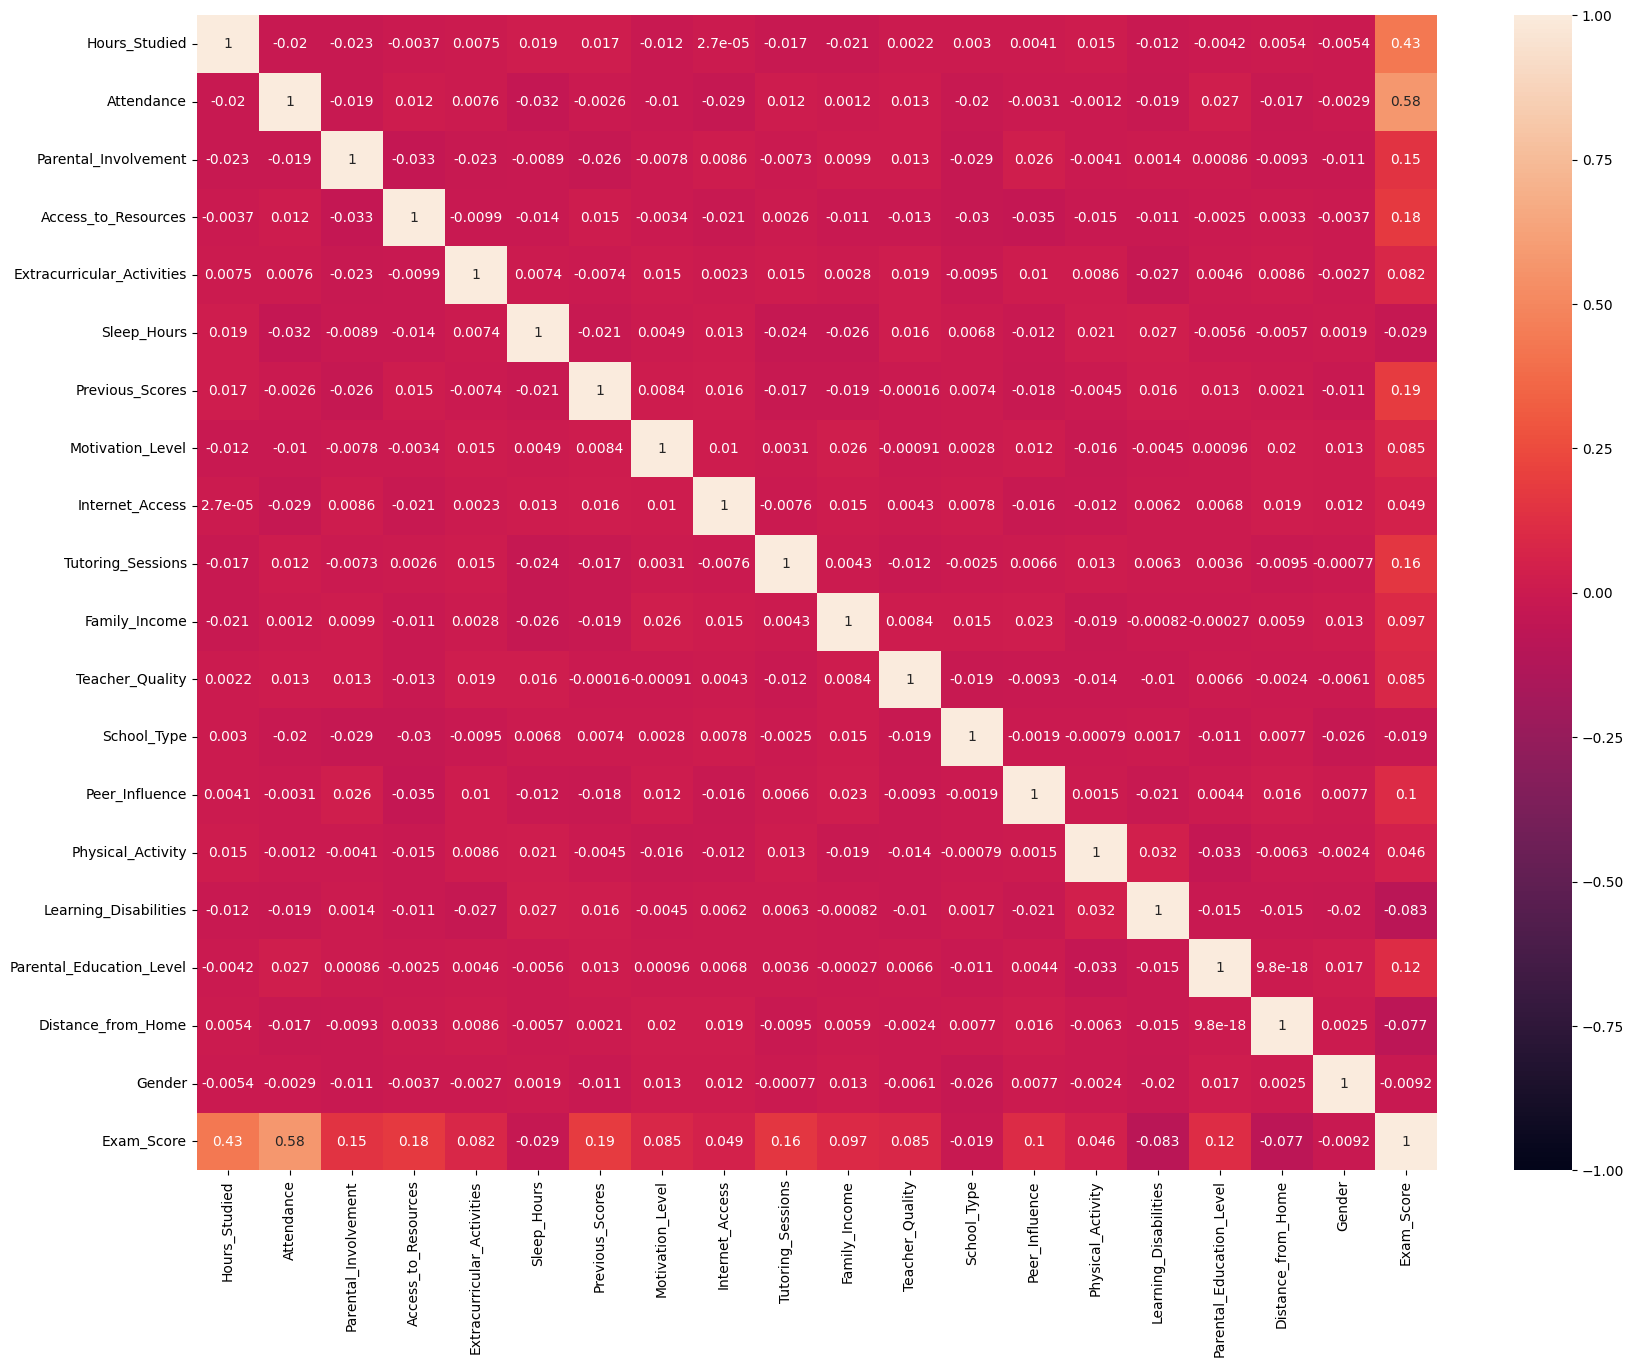

In [126]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### Provide Final Reprot about the train data

In [127]:
# report = ProfileReport(data)
# report.to_notebook_iframe()


### Handling Missing Values in Validation and Test Data 

- The result of the mode strategy that was applied to the train data was used to fill the missing values in the test data.

In [128]:
test_data=pd.read_csv("test_data.csv")
valid_data=pd.read_csv("valid_data.csv")

In [129]:
print("Validation Data :") 
valid_data.isnull().sum()


Validation Data :


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               12
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      16
Distance_from_Home            10
Gender                         0
Exam_Score                     0
dtype: int64

In [130]:
print("Test Data :") 
valid_data.isnull().sum()

Test Data :


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               12
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      16
Distance_from_Home            10
Gender                         0
Exam_Score                     0
dtype: int64

In [131]:
# Teacher Quality
valid_data['Teacher_Quality'].fillna(teacher_quality_mode,inplace=True)
test_data['Teacher_Quality'].fillna(teacher_quality_mode,inplace=True)
# Parental Education Level
valid_data['Parental_Education_Level'].fillna(Parental_Education_Level_mode,inplace=True)
test_data['Parental_Education_Level'].fillna(Parental_Education_Level_mode,inplace=True)
# Distance from home 
valid_data['Distance_from_Home'].fillna(Distance_from_Home_mode,inplace=True)
test_data['Distance_from_Home'].fillna(Distance_from_Home_mode,inplace=True)



C:\Users\msi\AppData\Local\Temp\ipykernel_17276\3027909179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_data['Teacher_Quality'].fillna(teacher_quality_mode,inplace=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_17276\3027909179.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

### Encoding Categorical Features in Validatin and Test Data
- The same encoding technique (used in the training set) was applied to the validation and test datasets.
- This ensures that the features in these datasets are transformed in the same manner as the training set, maintaining consistency across all data.


In [132]:
#Encoding Nominal feature 
# Gender
valid_data['Gender'] = pd.get_dummies(valid_data['Gender'], drop_first=True, dtype=int)
test_data['Gender'] = pd.get_dummies(test_data['Gender'], drop_first=True, dtype=int)
# Learning Disabilities
valid_data['Learning_Disabilities'] = pd.get_dummies(valid_data['Learning_Disabilities'], drop_first=True, dtype=int)
test_data['Learning_Disabilities'] = pd.get_dummies(test_data['Learning_Disabilities'], drop_first=True, dtype=int)
# School Type
valid_data['School_Type'] = pd.get_dummies(valid_data['School_Type'], drop_first=True, dtype=int)
test_data['School_Type'] = pd.get_dummies(test_data['School_Type'], drop_first=True, dtype=int)
# Internet Access
valid_data['Internet_Access'] = pd.get_dummies(valid_data['Internet_Access'], drop_first=True, dtype=int)
test_data['Internet_Access'] = pd.get_dummies(test_data['Internet_Access'], drop_first=True, dtype=int)
# Extracurricular_Activities
valid_data['Extracurricular_Activities'] = pd.get_dummies(valid_data['Extracurricular_Activities'], drop_first=True, dtype=int)
test_data['Extracurricular_Activities'] = pd.get_dummies(test_data['Extracurricular_Activities'], drop_first=True, dtype=int)



In [133]:
# Encoding Ordinal Feature 
# ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]
    

mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

for feature in ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality"]:
    test_data[feature] = test_data[feature].map(mapping).astype(int)
    valid_data[feature] = valid_data[feature].map(mapping).astype(int)
    # Parental Education 
education_mapping = {
    "High School": 0,
    "College": 1,
    "Postgraduate": 2
}

test_data['Parental_Education_Level'] = test_data['Parental_Education_Level'].map(education_mapping).astype(int)
valid_data['Parental_Education_Level'] = valid_data['Parental_Education_Level'].map(education_mapping).astype(int)
# Peer Influence
influence_mapping = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

test_data["Peer_Influence"] = test_data["Peer_Influence"].map(influence_mapping).astype(int)
valid_data["Peer_Influence"] = valid_data["Peer_Influence"].map(influence_mapping).astype(int)
# Distance from home
distance_mapping = {
    "Near": 0,
    "Moderate": 1,
    "Far": 2
}
test_data["Distance_from_Home"] = test_data["Distance_from_Home"].map(distance_mapping).astype(int)
valid_data["Distance_from_Home"] =valid_data["Distance_from_Home"].map(distance_mapping).astype(int)





### Overview report for Validation Data

In [134]:
# report = ProfileReport(valid_data)
# report.to_notebook_iframe()


### Overview report for Test Data

In [135]:
# report = ProfileReport(test_data)
# report.to_notebook_iframe()


### Drop gender column

In [136]:
# Gender_encoded (0.0019): The correlation with exam score is nearly zero, suggesting gender has no influence on exam performance.

valid_data=valid_data.drop(["Gender"],axis=1)
test_data=test_data.drop(["Gender"],axis=1)
train_data=train_data.drop(["Gender"],axis=1)

In [137]:
x_train=train_data.drop("Exam_Score",axis=1)
y_train=train_data["Exam_Score"]
x_val=valid_data.drop("Exam_Score",axis=1)
y_val=valid_data["Exam_Score"]

# Training and Validation with Various Models

In this section, we will train and validate multiple regression models on the dataset. The models we will use are:

- **Linear Regression**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **Support Vector Regressor (SVR)**
- **K-Nearest Neighbors Regressor (KNN)**
- **XGBoost Regressor**

For each model, we will evaluate its performance using the following metrics:
- **R-squared Score (R²)**: A measure of how well the model explains the variance in the data.
- **Mean Absolute Error (MAE)**: A measure of the average magnitude of errors in predictions, without considering their direction.
- **Mean Squared Error (MSE)**: A measure of the average squared difference between actual and predicted values.

### Outlier Handling:
- **First Attempt**: In the initial round of training and validation, we will **not remove any outliers** to observe the natural performance of the models with the raw data.
- **Second Attempt**: In the second round, we will use the **Interquartile Range (IQR) method** to identify and remove outliers. This method uses the IQR to define the range of normal values and removes data points outside of this range to improve model performance.

The goal is to compare the performance of these models with and without outlier removal to determine whether handling outliers enhances the predictive accuracy.


In [138]:


# List of models
classifiers = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),
    ]



Training LinearRegression...
LinearRegression - Test R²: 0.7088, MAE: 0.5067, MSE: 4.2032


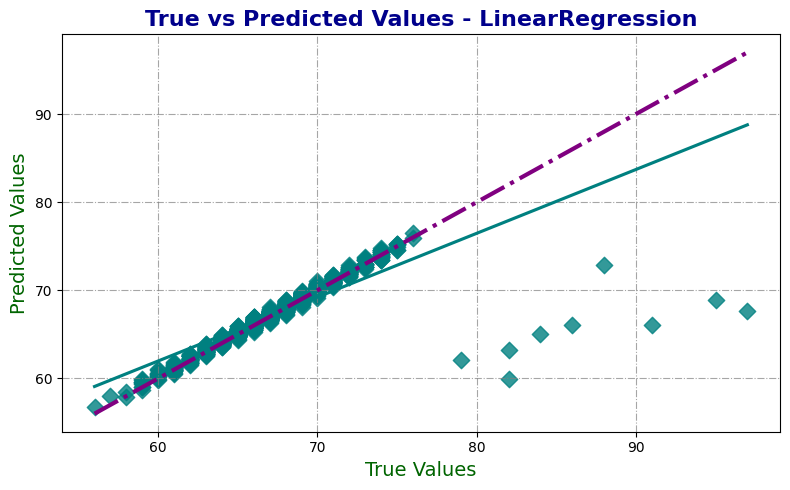


Training RandomForestRegressor...
RandomForestRegressor - Test R²: 0.6213, MAE: 1.1155, MSE: 5.4659


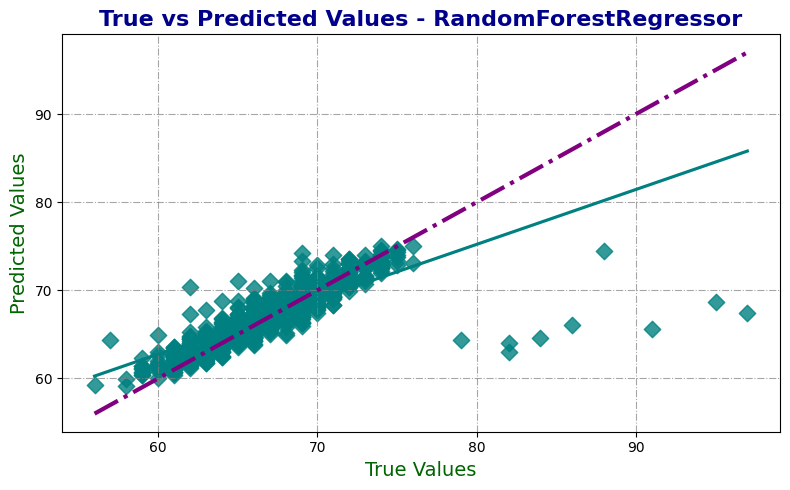


Training GradientBoostingRegressor...
GradientBoostingRegressor - Test R²: 0.6852, MAE: 0.8091, MSE: 4.5434


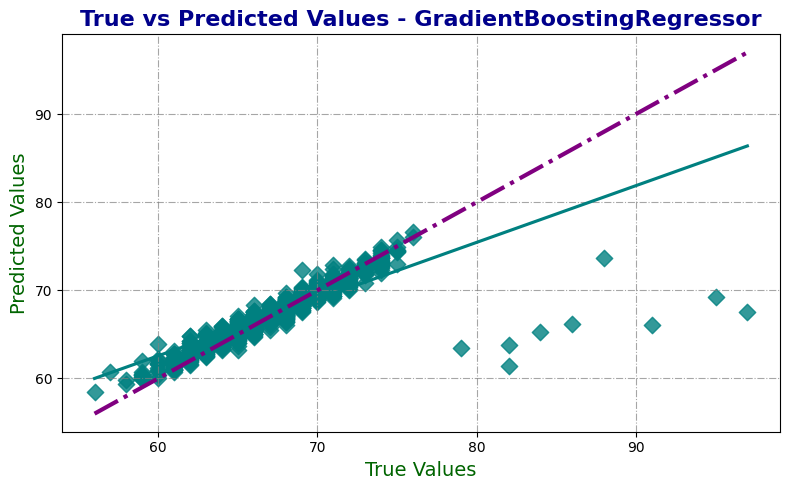


Training SVR...
SVR - Test R²: 0.6064, MAE: 1.1818, MSE: 5.6808


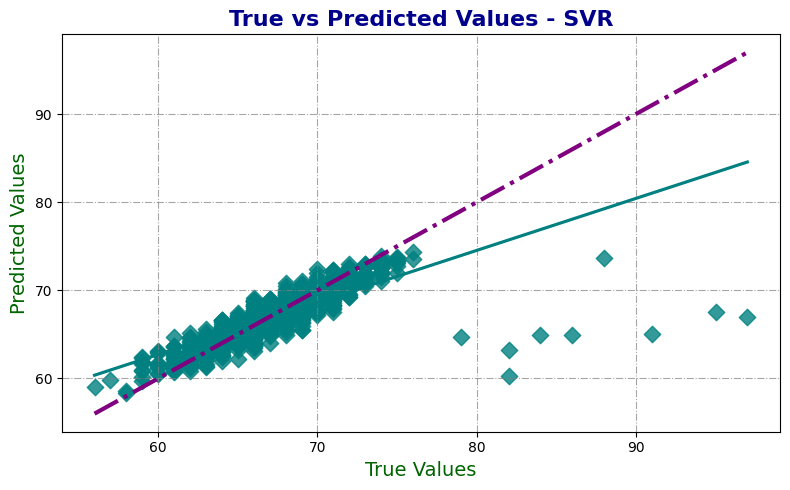


Training KNeighborsRegressor...
KNeighborsRegressor - Test R²: 0.5194, MAE: 1.4717, MSE: 6.9369


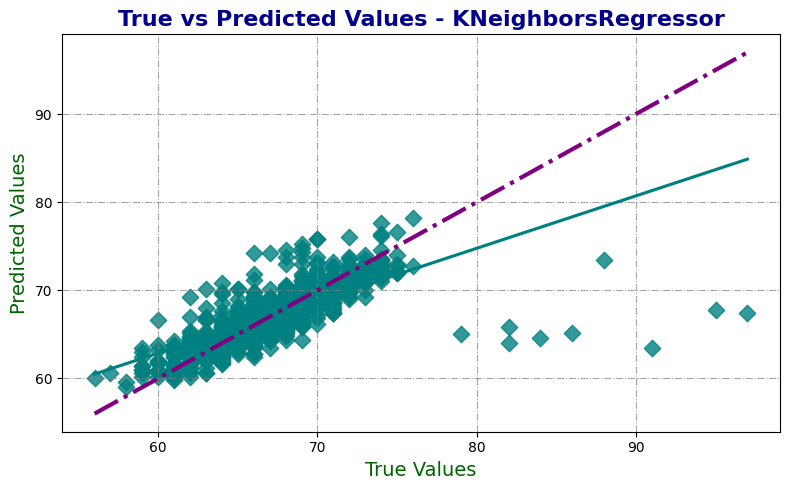


Training XGBRegressor...
XGBRegressor - Test R²: 0.6200, MAE: 1.0188, MSE: 5.4843


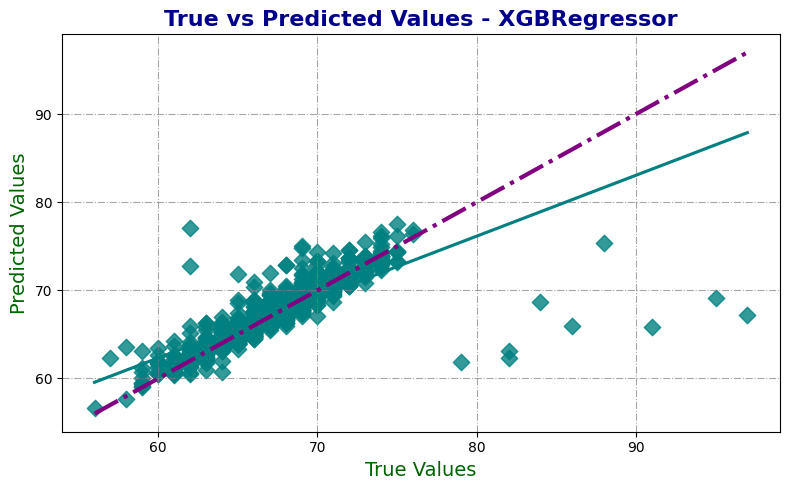


Summary Results:

Model: LinearRegression
Test R²: 0.7088
MAE: 0.5067
MSE: 4.2032

Model: RandomForestRegressor
Test R²: 0.6213
MAE: 1.1155
MSE: 5.4659

Model: GradientBoostingRegressor
Test R²: 0.6852
MAE: 0.8091
MSE: 4.5434

Model: SVR
Test R²: 0.6064
MAE: 1.1818
MSE: 5.6808

Model: KNeighborsRegressor
Test R²: 0.5194
MAE: 1.4717
MSE: 6.9369

Model: XGBRegressor
Test R²: 0.6200
MAE: 1.0188
MSE: 5.4843


In [139]:
withoutresults = {}

for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}...")

    
    # Fit the model on the training set
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_val)
    
    # Evaluation metrics
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    
    # Store results
    withoutresults[model_name] = {
        # "CV R²": np.mean(cv_scores),
        "Test R²": r2,
        "MAE": mae,
        "MSE": mse
    }
    
    # Print metrics
    print(f"{model_name} - Test R²: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")
    
    # Plot True vs Predicted values
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_val, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s': 70, 'alpha': 0.8})
    
    # Add reference line for perfect prediction
    max_val = max(max(y_val), max(y_pred))
    min_val = min(min(y_val), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)
    
    # Set plot titles and labels
    plt.title(f'True vs Predicted Values - {model_name}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('True Values', fontsize=14, color='darkgreen')
    plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')
    
    # Add grid and adjust layout
    plt.grid(True, linestyle='-.', alpha=0.7, color='grey')
    plt.tight_layout()
    plt.show()

# Display summary results
print("\nSummary Results:")
for model_name, metrics in withoutresults.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


### Second Attempt: Outlier Removal with IQR Method

In this round, we will handle outliers using the **Interquartile Range (IQR) method**. This approach identifies data points that fall outside the normal range, defined as:

- **Lower bound**: Q1 - 1.5 * IQR
- **Upper bound**: Q3 + 1.5 * IQR

Where:
- Q1 is the first quartile (25th percentile),
- Q3 is the third quartile (75th percentile),
- IQR is the interquartile range (Q3 - Q1).

To avoid removing too much data, we will use a higher threshold of **5** for the IQR multiplier. This means that we will only remove data points that are significantly far from the central range, minimizing the impact on the dataset while still addressing extreme outliers. 

After removing outliers, we will retrain the models and evaluate them again using the same performance metrics (R², MAE, MSE) to assess the impact of outlier removal on model performance.


In [140]:
# Columns to check for outliers
columns_of_interest = ['Exam_Score', 'Tutoring_Sessions']

# Calculate IQR for the selected columns
Q1 = train_data[columns_of_interest].quantile(0.25)
Q3 = train_data[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the selected columns
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in the selected columns
train_data_no_outliers = train_data[
    ~((train_data[columns_of_interest] < lower_bound) | (train_data[columns_of_interest] > upper_bound)).any(axis=1)
]

# Optionally split into features and target
x_train = train_data_no_outliers.drop('Exam_Score', axis=1)
y_train = train_data_no_outliers["Exam_Score"]

print(f"Shape before removing outliers: {train_data.shape}")
print(f"Shape after removing outliers: {train_data_no_outliers.shape}")


Shape before removing outliers: (4228, 19)
Shape after removing outliers: (3890, 19)



Training LinearRegression...
LinearRegression - Test R²: 0.7074, MAE: 0.4537, MSE: 4.2227


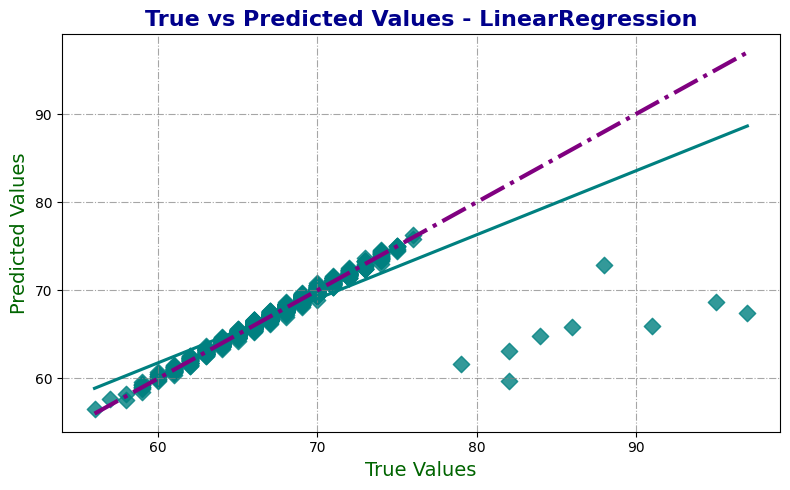


Training RandomForestRegressor...
RandomForestRegressor - Test R²: 0.6332, MAE: 1.0545, MSE: 5.2935


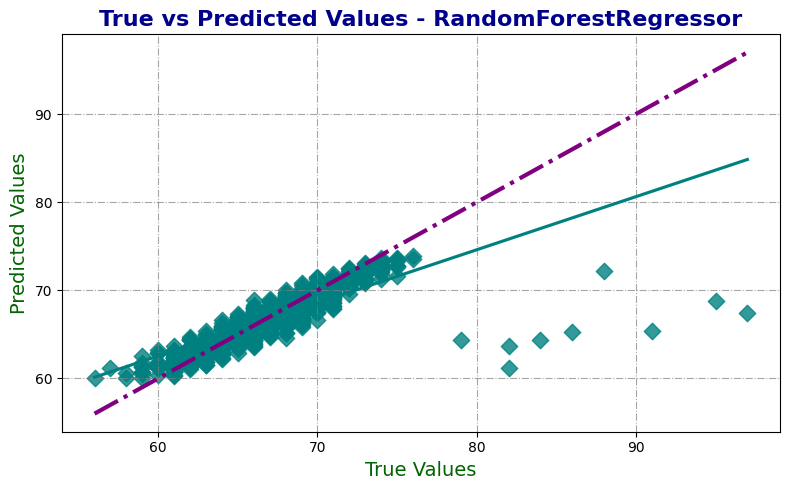


Training GradientBoostingRegressor...
GradientBoostingRegressor - Test R²: 0.6760, MAE: 0.8061, MSE: 4.6761


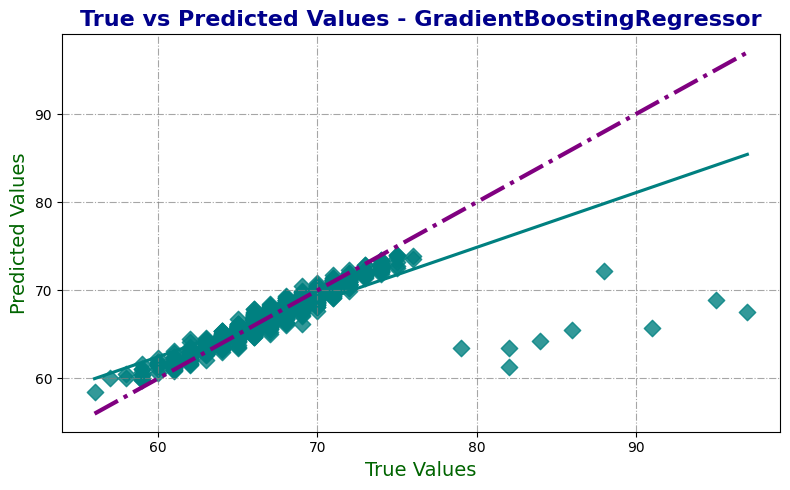


Training SVR...
SVR - Test R²: 0.5973, MAE: 1.2234, MSE: 5.8129


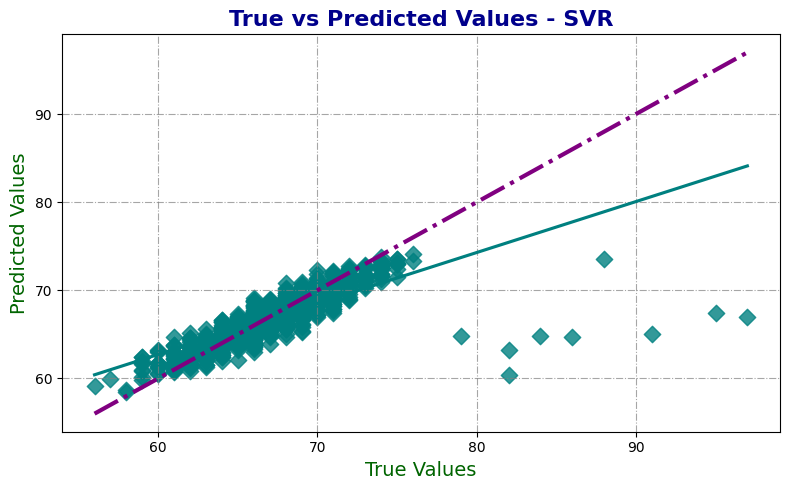


Training KNeighborsRegressor...
KNeighborsRegressor - Test R²: 0.5603, MAE: 1.3629, MSE: 6.3462


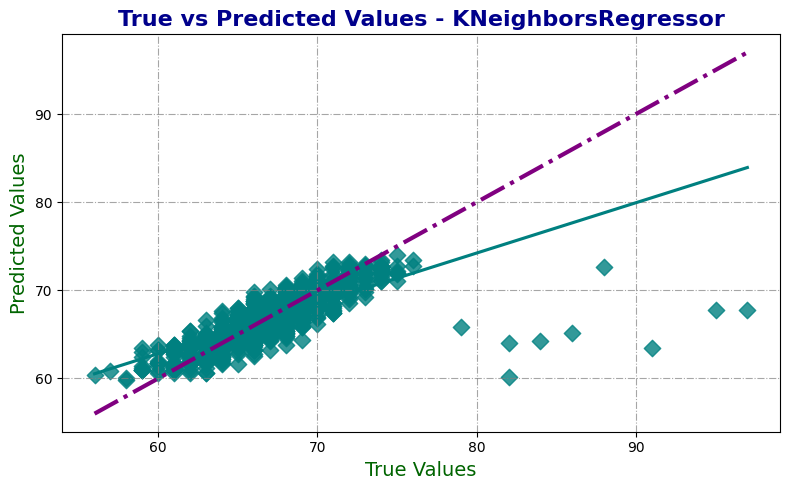


Training XGBRegressor...
XGBRegressor - Test R²: 0.6871, MAE: 0.7432, MSE: 4.5158


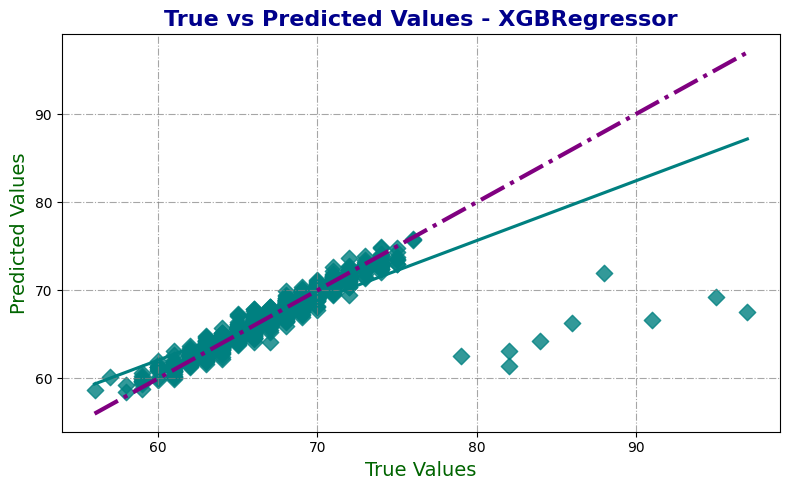


Summary Results:

Model: LinearRegression
Test R²: 0.7074
MAE: 0.4537
MSE: 4.2227

Model: RandomForestRegressor
Test R²: 0.6332
MAE: 1.0545
MSE: 5.2935

Model: GradientBoostingRegressor
Test R²: 0.6760
MAE: 0.8061
MSE: 4.6761

Model: SVR
Test R²: 0.5973
MAE: 1.2234
MSE: 5.8129

Model: KNeighborsRegressor
Test R²: 0.5603
MAE: 1.3629
MSE: 6.3462

Model: XGBRegressor
Test R²: 0.6871
MAE: 0.7432
MSE: 4.5158


In [141]:
without_outliers_results = {}

for model in classifiers:
    model_name = model.__class__.__name__
    print(f"\nTraining {model_name}...")

    
    # Fit the model on the training set
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_val)
    
    # Evaluation metrics
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    
    # Store results
    without_outliers_results[model_name] = {
        "Test R²": r2,
        "MAE": mae,
        "MSE": mse
    }
    
    # Print metrics
    print(f"{model_name} - Test R²: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")
    
    # Plot True vs Predicted values
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_val, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s': 70, 'alpha': 0.8})
    
    # Add reference line for perfect prediction
    max_val = max(max(y_val), max(y_pred))
    min_val = min(min(y_val), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)
    
    # Set plot titles and labels
    plt.title(f'True vs Predicted Values - {model_name}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('True Values', fontsize=14, color='darkgreen')
    plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')
    
    # Add grid and adjust layout
    plt.grid(True, linestyle='-.', alpha=0.7, color='grey')
    plt.tight_layout()
    plt.show()

# Display summary results
print("\nSummary Results:")
for model_name, metrics in without_outliers_results.items():
    print(f"\nModel: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

### Model Comparison

We will create a **Pandas DataFrame** to display the performance of each model with the metrics: **Test R²**, **MAE**, and **MSE**. The DataFrame will have the model names as a separate column.

Next, we will visualize the performance of each model using **bar plots**. We will create separate plots for each metric (**Test R²**, **MAE**, **MSE**) to compare the models side-by-side and identify which performs best in each case.


C:\Users\msi\AppData\Local\Temp\ipykernel_17276\1841866191.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


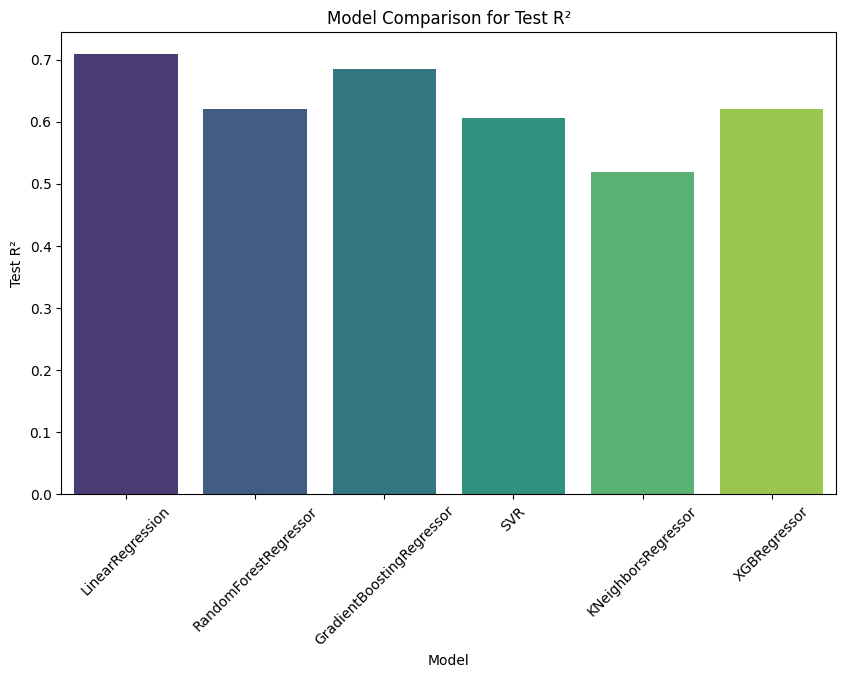

C:\Users\msi\AppData\Local\Temp\ipykernel_17276\1841866191.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


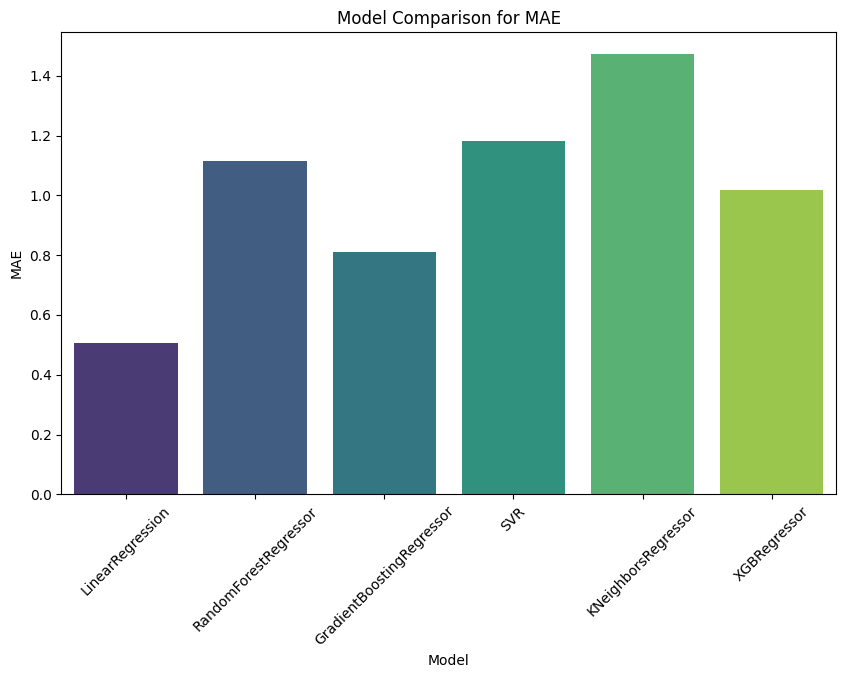

C:\Users\msi\AppData\Local\Temp\ipykernel_17276\1841866191.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


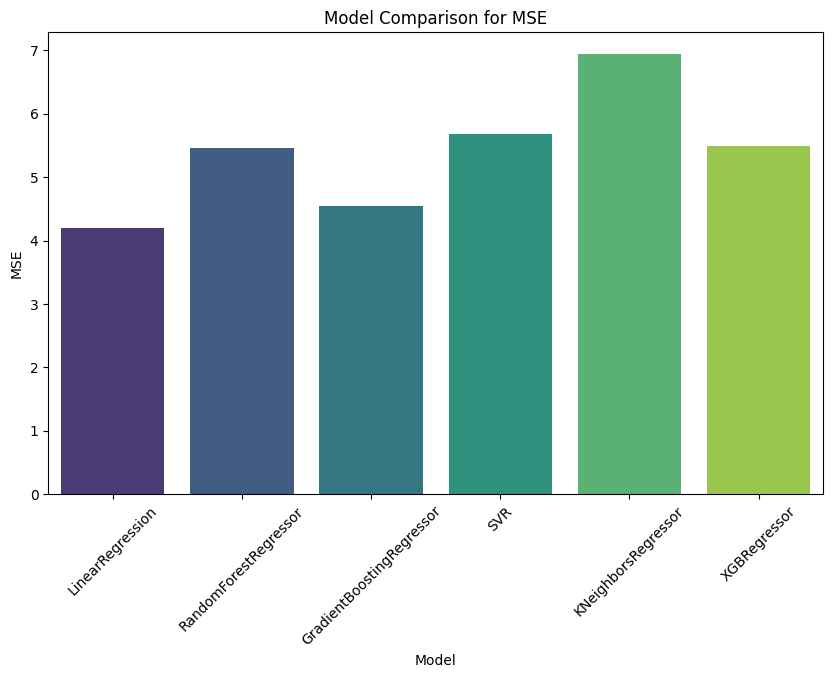

In [142]:
# Convert results to pandas DataFrame
results_df = pd.DataFrame(withoutresults).T  # Transpose to get models as rows

# Reset index to have model names as a column
results_df = results_df.reset_index().rename(columns={'index': 'Model'})

# Plotting using Seaborn
metrics = ['Test R²', 'MAE', 'MSE']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'Model Comparison for {metric}')
    plt.xticks(rotation=45)
    plt.show()

### Performance Prediction Interface

We have created a function called `predict_performance` that takes various input features such as **Hours Studied**, **Attendance**, **Parental Involvement**, etc., to predict student performance based on a trained model (`forest_model`).

To make predictions easier, we built a **Gradio interface** where users can input these features via interactive elements like sliders, dropdowns, and textboxes. The function will return the predicted performance value based on the input features.

The interface includes the following inputs:
- **Sliders** for numerical inputs like Hours Studied, Attendance, Sleep Hours, Previous Scores, etc.
- **Dropdowns** for categorical inputs like Parental Involvement, Motivation Level, Internet Access, etc.

The output is displayed as a prediction text box that shows the model’s result.


In [143]:
X_combined = pd.concat([x_train, x_val])  # Combine feature data
y_combined = pd.concat([y_train, y_val])  # Combine target data
x_test=test_data.drop("Exam_Score",axis=1)
y_test=test_data["Exam_Score"]
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the combined data
model.fit(X_combined, y_combined)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate R² score on the test data
r2 = r2_score(y_test, y_pred)

# Print the R² score
print(f"R² Score on Test Data: {r2:.4f}")

R² Score on Test Data: 0.7714


In [144]:
def predict_performance(
    Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources,
    Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level,
    Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality,
    School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities,
    Parental_Education_Level, Distance_from_Home
):
    x2_val=[[Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources,
    Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level,
    Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality,
    School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities,
    Parental_Education_Level, Distance_from_Home]]
    prediction=model.predict(x2_val)[0]
    return prediction


demo = gr.Interface(
    fn=predict_performance,
   inputs=[
        gr.Slider(minimum=1, maximum=44, step=1, label="Hours_Studied"),
        gr.Slider(minimum=60, maximum=100, step=1, label="Attendance"),
        gr.Dropdown(choices=["Low", "Medium", "High"], type="index", label="Parental_Involvement"),
        gr.Dropdown(choices=["Low", "Medium", "High"], type="index", label="Access_to_Resources"),
        gr.Dropdown(choices=["No", "Yes"], type="index", label="Extracurricular_Activities"),
        gr.Slider(minimum=4, maximum=10, step=1, label="Sleep_Hours"),
        gr.Slider(minimum=50, maximum=100, step=1, label="Previous_Scores"),
        gr.Dropdown(choices=["Low", "Medium", "High"], type="index", label="Motivation_Level"),
        gr.Dropdown(choices=["No", "Yes"], type="index", label="Internet_Access"),
        gr.Slider(minimum=0, maximum=8, step=1, label="Tutoring_Sessions"),
        gr.Dropdown(choices=["Low", "Medium", "High"],type="index", label="Family_Income"),
        gr.Dropdown(choices=["Low", "Medium", "High"], type="index", label="Teacher_Quality"),
        gr.Dropdown(choices=["Private", "Public"], type="index", label="School_Type"),
        gr.Dropdown(choices=["Negative", "Neutral","Positive"], type="index", label="Peer_Influence"),
        gr.Slider(minimum=0, maximum=6, step=1, label="Physical_Activity"),
        gr.Dropdown(choices=["No", "Yes"], type="index", label="Learning_Disabilities"),
        gr.Dropdown(choices=["High School", "College", "Postgraduate"], type="index", label="Parental_Education_Level"),
        gr.Dropdown(choices=["Near", "Moderate","Far"], type="index", label="Distance_from_Home")
   
    ],
    outputs=gr.Textbox(label="Prediction"),

)


demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://ca1c28af0460695add.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


d:\ML\exam_prediction\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
